# Setup

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=8)

In [2]:
import time
import itertools as it
import numpy as np
from copy import copy

%matplotlib inline

# reload module each time cell is run
%load_ext autoreload
%autoreload 2

# load the BufferStockModel module
from DurableConsumptionModel import DurableConsumptionModelClass

# Main

In [3]:
load = True
load_negm = load
load_negm_cpp = load
load_negm_simple = load
load_nvfi = load
load_nvfi_cpp = load
load_nvfi_simple = load
load_vfi_cpp = load
T = 50
models = dict()

# baseline
basename = 'results'
base = dict()
base['Np'] = 100
base['Nn'] = 100
base['Nm'] = 200
base['Nx'] = 200
base['Na'] = 200
base['Npsi'] = 8
base['Nxi'] = 8
base['T'] = T
base['do_print'] = True

facs = [1]
vars = ['Np','Nn','Nm','Nx','Na']
for i,fac in enumerate(facs):
    
    # a. negm
    negm = copy(base)
    for var in vars:
        negm[var] = np.int32(fac*negm[var])

    model = DurableConsumptionModelClass(name=f'{basename}_{i}',load=load_negm_cpp,solmethod='negm_cpp',**negm)
    if load_negm_cpp == False:
        model.analyze()
        model.save()
    else:
        model.print_analysis()        
    models[('negm_cpp',i)] = model
    
    # simple
    model = DurableConsumptionModelClass(name=f'{basename}_{i}_simple',load=load_negm_simple,solmethod='negm_cpp',do_simple_wq=True,**negm)
    if load_negm_simple == False:
        model.analyze()
        model.save()
    else:
        model.print_analysis()        
    models[('negm_simple',i)] = model
        
    # python
    model = DurableConsumptionModelClass(name=f'{basename}_{i}',load=load_negm,solmethod='negm',**negm)
    if load_negm == False:
        model.analyze()
        model.save()
    else:
        model.print_analysis()        
    models[('negm',i)] = model
    
    # b. nvfi
    nvfi = copy(base)
    for var in vars:
        nvfi[var] = np.int32(fac*nvfi[var])
        
    model = DurableConsumptionModelClass(name=f'{basename}_{i}',load=load_nvfi_cpp,solmethod='nvfi_cpp',**nvfi)
    if load_nvfi_cpp == False:
        model.analyze()
        model.save()
    else:
        model.print_analysis()        
    models[('nvfi_cpp',i)] = model
    
    # simple
    model = DurableConsumptionModelClass(name=f'{basename}_{i}_simple',load=load_nvfi_simple,solmethod='nvfi_cpp',do_simple_wq=True,**nvfi)
    if load_nvfi_simple == False:
        model.analyze()
        model.save()
    else:
        model.print_analysis()        
    models[('nvfi_simple',i)] = model
    
    # python
    model = DurableConsumptionModelClass(name=f'{basename}_{i}',load=load_nvfi,solmethod='nvfi',**nvfi)
    if load_nvfi == False:
        model.analyze()
        model.save()
    else:
        model.print_analysis()        
    models[('nvfi',i)] = model
    
    # c. vfi
    vfi = copy(base)
    for var in vars:
        vfi[var] = np.int32(fac*vfi[var])
        
    model = DurableConsumptionModelClass(name=f'{basename}_{i}',load=load_vfi_cpp,solmethod='vfi_cpp',**vfi)
    if load_vfi_cpp == False:
        model.analyze()
        model.save()
    else:
        model.print_analysis()
    models[('vfi_cpp',i)] = model
    

Name: results_0 (solmethod = negm_cpp)
Grids: (p,n,m,x,a) = (100,100,200,200,200)
Timings:
 total: 47.8
     w: 38.9
  keep: 8.3
   adj: 0.6
Utility: -32.213481
Euler errors:
     total: -4.51 (-5.84,-3.10)
   keepers: -4.38 (-5.70,-3.01)
 adjusters: -5.17 (-6.24,-3.92)
Moments:
 adjuster share: 0.172
         mean c: 0.979
          var c: 0.256
         mean d: 0.562
          var d: 0.112

Name: results_0_simple (solmethod = negm_cpp)
Grids: (p,n,m,x,a) = (100,100,200,200,200)
Timings:
 total: 99.8
     w: 90.5
  keep: 8.6
   adj: 0.7
Utility: -32.213481
Euler errors:
     total: -4.51 (-5.84,-3.10)
   keepers: -4.38 (-5.70,-3.01)
 adjusters: -5.17 (-6.24,-3.92)
Moments:
 adjuster share: 0.172
         mean c: 0.979
          var c: 0.256
         mean d: 0.562
          var d: 0.112

Name: results_0 (solmethod = negm)
Grids: (p,n,m,x,a) = (100,100,200,200,200)
Timings:
 total: 78.6
     w: 60.5
  keep: 10.8
   adj: 7.3
Utility: -32.213481
Euler errors:
     total: -4.51 (-5.84,-3.1

# Tables

In [10]:
import tabs
i = 0
main_models = [models[('vfi_cpp',i)],models[('nvfi_simple',i)],models[('negm_simple',i)],models[('nvfi_cpp',i)],models[('negm_cpp',i)]]
tabs.all(main_models)

In [11]:
i = 0
main_models = [models[('nvfi_cpp',i)],models[('nvfi',i)],models[('negm_cpp',i)],models[('negm',i)]]
tabs.all(main_models,postfix='_python')

# Figures

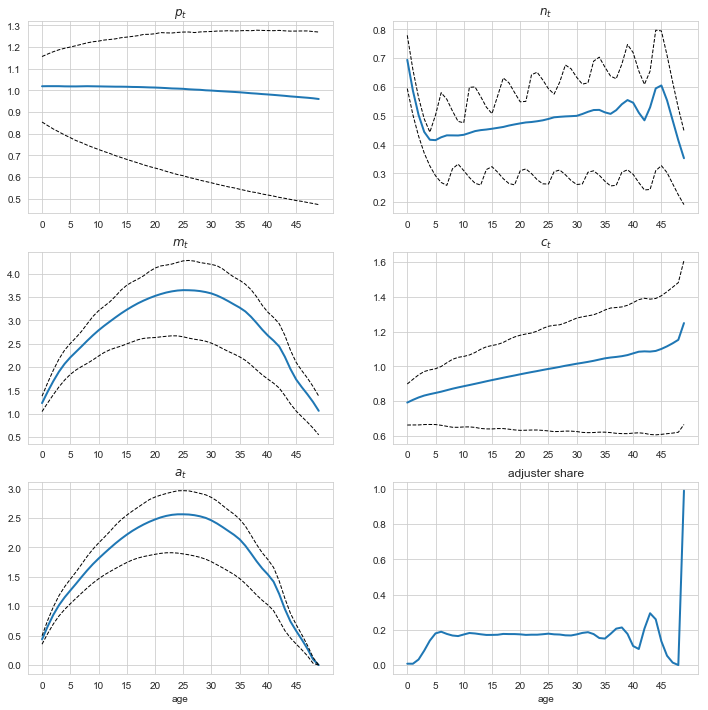

In [9]:
models[('negm_cpp',len(facs)-1)].lifecycle()

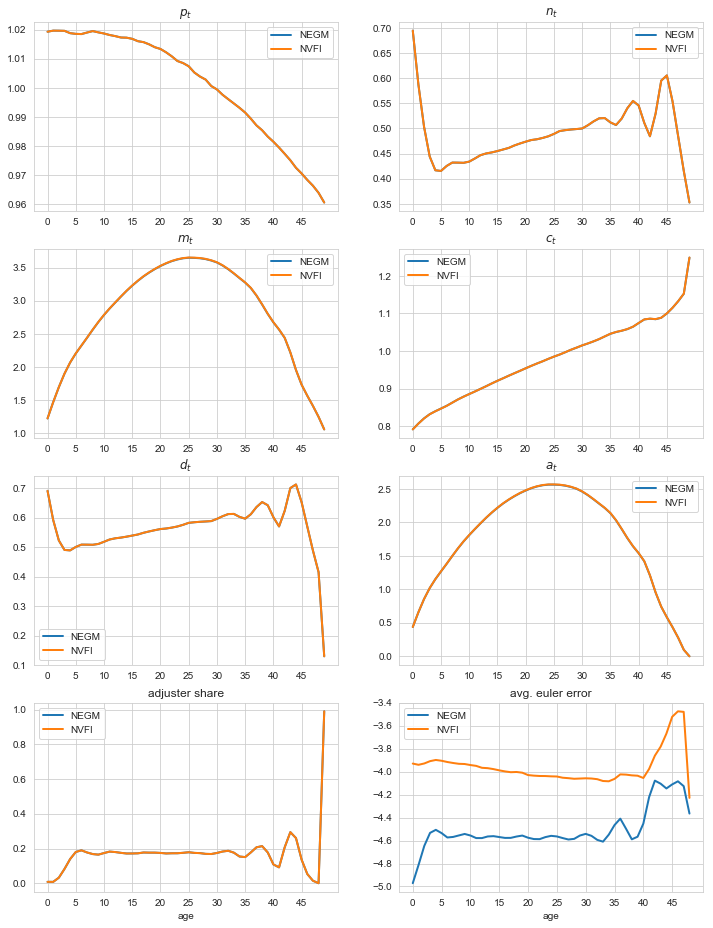

In [7]:
from figs import lifecycle_compare
lifecycle_compare(models[('negm_cpp',len(facs)-1)],'NEGM',models[('nvfi_cpp',len(facs)-1)],'NVFI',do_euler_errors=True)

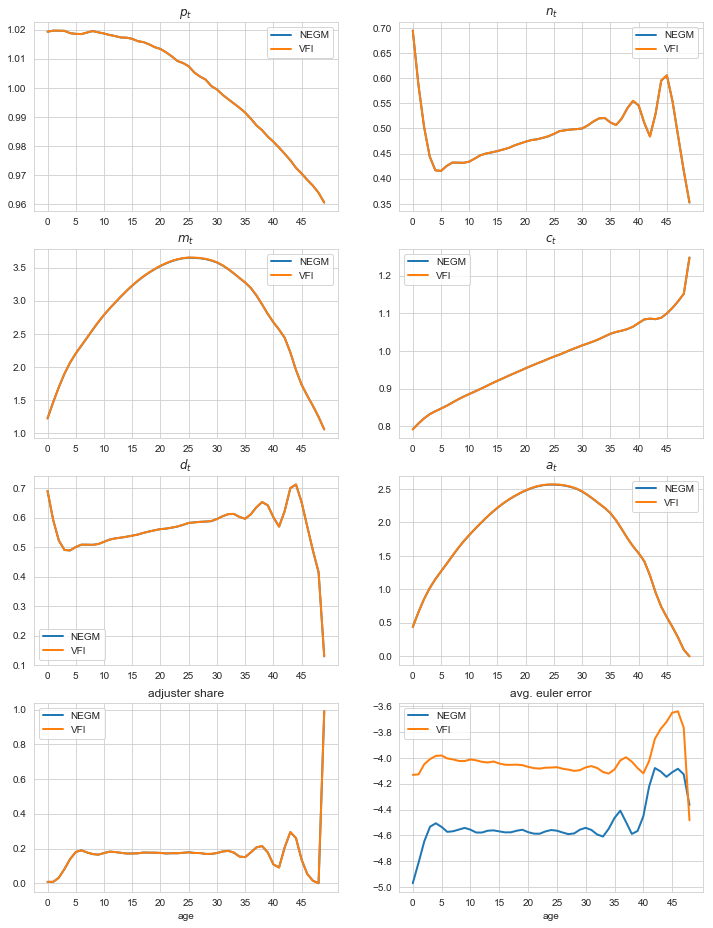

In [8]:
lifecycle_compare(models[('negm_cpp',len(facs)-1)],'NEGM',models[('vfi_cpp',len(facs)-1)],'VFI',do_euler_errors=True)